In [1]:
import pandas as pd
import numpy as np
import spacy 

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv', encoding = 'latin1')

In [4]:
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


In [5]:
df['sentiment'].value_counts()

1    2000
0    2000
Name: sentiment, dtype: int64

# word counts

In [6]:
len('this is text'.split())

3

In [7]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [8]:
df.sample(5)

,twitts,sentiment,word_counts
2267,"headed to bed. strange day, i didnt have to work",1,10
972,It was a nightmare...a terrible night,0,6
139,@thelithopedion it's so weird. Don't quite kno...,0,20
2058,@BonnieSwansong I do it reluctantly. If I don'...,1,24
964,Facebook...if you're out there...listening...t...,0,13


In [9]:
df['word_counts'].max()

32

In [10]:
df['word_counts'].min()

1

In [11]:
df[df['word_counts']==1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


# characters count

In [12]:
len('this is')

7

In [13]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [14]:
char_counts('this is')

6

In [15]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [16]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
2839,@iwabo awesome video been waiting for it!,1,7,35
2185,Just finished watching dirty dancing and titan...,1,14,71
1506,"i?C.B+T.H|| Everyone is like, leaving",0,5,33
1566,@pastapadre that was my biggest gripe with the...,0,14,75
1756,Aww man its gone soo sad but it was too good ...,0,24,87


# AVERAGE WORD LENGTH

In [17]:
x = 'this is'  # 6/2 = 3
y = 'thankyou guys' #12/2 = 6

In [18]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [19]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len
1448,Flu &amp; Sore throat......ain't fun,0,5,32,6.400000
1833,i want to go to the show tonight next weekend...,0,14,61,4.357143
524,i just ran and jumped over a chair and hit my ...,0,15,49,3.266667
1192,@tatylicous I wanted to dance with you awwwww ...,0,27,111,4.111111
3025,@mrvdw. omg please you better get a tub of may...,1,26,113,4.346154


# STOP WORDS COUNT

In [20]:
print(stopwords)

{'due', 'around', 'thus', 'this', 'empty', 'me', 'whereby', 'will', 'first', 'any', 'of', 'only', 'well', 'that', 'keep', 'every', '‘re', "'ve", 'seem', 'done', 'unless', 'also', 'next', 'without', 'always', 'give', 'seeming', 'toward', 'herself', 'did', '’ll', 'bottom', 'either', 'side', 'thereupon', 'no', 'the', 'should', 'seemed', 'beside', 'whereupon', 'from', 'formerly', "'re", 'eight', "'s", 'anywhere', 'sometimes', 'serious', 'sometime', 'each', 'former', 'us', 'perhaps', 'full', 'into', 'be', 'nor', 'across', '‘m', 'via', 'already', 'but', 'i', 'eleven', 'whole', 'almost', 'my', 'among', 'few', 'indeed', 'besides', 'becoming', 'him', 'thru', 'her', 'ca', 'somehow', 'nobody', 'how', 'because', 'than', 'may', 'them', 'latterly', "'d", 'ourselves', 'please', 'would', 'get', 'again', 'nevertheless', 'being', 'where', "n't", 'off', 'really', 'less', 'can', 'might', 'along', 'elsewhere', 'yours', 'just', 'same', 'while', 'latter', 'up', 'anyhow', 'top', 'have', 'which', 'for', 'very'

In [21]:
len(stopwords)

326

In [22]:
x = 'this is the text data'

In [23]:
x.split()

['this', 'is', 'the', 'text', 'data']

In [24]:
[t for t in x.split() if t in stopwords]

['this', 'is', 'the']

In [25]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [26]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
1497,Rubber boots and pond scum!! I had to kill tad...,0,10,45,4.500000,3
1554,3rd phone call to ATO.... still no Rudd bonus ...,0,27,105,3.888889,10
1846,Off to Boston to see @JakobBoNielsen in a few ...,0,22,96,4.363636,11
3699,@AmyyJoanne lol James Morrison all the way x x,1,9,38,4.222222,2
399,My kitty Gordon just died after weeks of strug...,0,22,102,4.636364,7


# Count #Hash Tags and @Mentions

In [27]:
x = 'this is #hashtag and this is @mention'

In [28]:
x.split()

['this', 'is', '#hashtag', 'and', 'this', 'is', '@mention']

In [29]:
[t for t in x.split() if t.startswith('#')]

['#hashtag']

In [30]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [31]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [32]:
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [33]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
2461,another shoot in town tommorow more live shot...,1,18,94,5.222222,6,0,0
776,Forgot that yesterday is the expiry date for m...,0,14,77,5.500000,5,0,0
264,@itsdarryldsmith noooo! Leave public jersey we...,0,9,56,6.222222,2,0,1
1847,My move has failed she called me to find out ...,0,15,55,3.666667,8,0,0
3633,Goin 2 bed! Gona have a total pamper day 2moro...,1,13,58,4.461538,4,0,0


# if numeric digits are present in twitts

In [34]:
x = 'this is 1 and 2'

In [35]:
x.split()

['this', 'is', '1', 'and', '2']

In [36]:
x.split()[3].isdigit()

False

In [37]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [38]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
3528,@JSpikEThinG The &quot;anti&quot; rhetoric ha...,1,19,151,7.947368,4,0,1,0
3654,@ariella44 hey rielle look whos here! love you,1,8,39,4.875000,1,0,1,0
2076,86 degrees at 9pm....i too love california D....,1,8,41,5.125000,2,0,0,1
3913,For The Press So After She Recovered She Kille...,1,24,100,4.166667,1,0,0,0
1891,"just woke up, its 2am here n I can't get back ...",0,13,42,3.230769,6,0,0,0


# UPPER case words count

In [39]:
x = 'I AM HAPPY'
y = 'i am happy'

In [40]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [41]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [42]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
3463,@miranda120 omg thank you so much! &lt;33333 ...,1,8,45,5.625000,2,0,1,0,0
297,No thats bad!! Lol and yeah he was a sucky wa...,0,13,52,4.000000,4,0,1,0,0
2802,@nickcarver Modesto! That's my home town,1,6,35,5.833333,1,0,1,0,0
2169,Luvs her Machie - Poo !!! R friendship is tigh...,1,16,65,4.062500,4,0,0,0,2
2030,got my va tax refund...now waiting on the fatt...,1,12,56,4.666667,3,0,0,0,0


# Lower Case Conversion

In [43]:
x = 'this is Text'

In [44]:
x.lower()

'this is text'

In [45]:
x = 45
str(x).lower()

'45'

In [46]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [47]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
1869,i have three hours to do my hair. and it still...,0,14,51,3.642857,9,0,0,0,1
1953,@errinmerrrill no even worse. the party till y...,0,11,53,4.818182,4,0,1,0,0
606,@hoodenershorse would love to pop down for lun...,0,19,84,4.421053,11,0,1,0,0
2411,don't feel very well so i'm just gonna rest t...,1,13,58,4.461538,6,0,0,0,0
3798,i'm in the central time zone. season starts no...,1,10,61,6.100000,2,1,0,0,1


# contraction to expansion

In [49]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [53]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [54]:
#cont_to_exp(x)

In [55]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

140 ms ± 6.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [56]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
661,is wondering why when david finally comes to e...,0,19,83,4.368421,8,0,0,0,1
3575,@kirstiealley : ooops that should have been @g...,1,15,77,5.133333,8,0,2,0,0
2905,@dcmabnikki get 100 followers a day using www....,1,20,98,4.900000,9,0,1,1,0
3527,@astro_mike wish you and your team the very be...,1,20,80,4.000000,7,0,1,0,7
1316,ive been walking around in heels all day. ouch...,0,16,68,4.250000,7,0,0,0,0


# count and Remove Emails

In [64]:
import re

In [61]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0


In [62]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [63]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [70]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)

['markbradbury_16@hotmail.com']

In [71]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [72]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [73]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [74]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

'@securerecs arghh me please  '

In [75]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [76]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


# count URLs and Remove it

In [77]:
x = 'hi, thanks for watching it for more visit my https://github.com/rajuneelakantam/Data-Science '

In [79]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'github.com', '/rajuneelakantam/Data-Science')]

In [82]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [83]:
df[df['url_flags']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
16,@brianquest i made 1 fo u 2: http://bit.ly/eid...,0,19,81,4.263158,3,0,1,1,3,[],0,1
98,heading to work http://twitpic.com/4eojz,0,4,37,9.250000,1,0,0,0,0,[],0,1
99,@blondeblogger http://twitpic.com/4w8hk - i am...,0,10,62,6.200000,4,0,1,0,0,[],0,1
144,i miss you ã¢ââ« http://blip.fm/~8lc2f,0,5,35,7.000000,1,0,0,0,2,[],0,1
183,photo: miss germany http://tumblr.com/xf825f012,0,4,44,11.000000,0,0,0,0,0,[],0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,new staark video of &quot;sweet release&quot; ...,1,20,118,5.900000,4,0,0,0,1,[],0,1
3826,http://tinyurl.com/kwmynq helmet - unsung to s...,1,9,76,8.444444,2,0,0,0,0,[],0,2
3837,@r0ckergirl14 wow sweet again!! http://twitpi...,1,5,52,10.400000,0,0,1,0,0,[],0,1
3958,someone has been creative with my #deskmess wh...,1,13,91,7.000000,7,1,1,0,0,[],0,1


In [84]:
x

'hi, thanks for watching it for more visit my https://github.com/rajuneelakantam/Data-Science '

In [85]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"", x)

'hi, thanks for watching it for more visit my  '

In [86]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"", x) )

In [87]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1270,taylor lautner's gonna be at the mmva's...i re...,0,11,51,4.636364,6,0,0,0,0,[],0,0
477,"well, six months of trying to get pregnant and...",0,18,70,3.888889,11,0,0,0,0,[],0,0
1186,i sliced my finger,0,4,15,3.750000,2,0,0,0,0,[],0,0
3024,"@tha2809 haha yeah man, hope you are good",1,7,34,4.857143,0,0,1,0,0,[],0,0
2116,@caseybrothers nope holding a nice hot cup of ...,1,12,57,4.750000,4,0,1,0,0,[],0,0


# Remove RT

In [88]:
df[df['twitts'].str.contains('rt ')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
59,@paulmccourt dunno what sky you are looking at...,0,15,80,5.333333,3,0,1,0,0,[],0,0
106,doing art while watching season 6 of family gu...,0,15,59,3.933333,8,0,0,1,0,[],0,0
114,@jsong77 not done it is almost 2 am this you...,0,13,62,4.769231,1,0,1,1,5,[],0,0
152,@bagginsboy best part is i have got t4 to watc...,0,11,49,4.454545,4,0,1,0,0,[],0,0
178,"watching jonas brothers on mtv, missed the 3d ...",0,11,50,4.545455,3,0,0,0,2,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,helmet - unsung to start your day,1,9,76,8.444444,2,0,0,0,0,[],0,2
3877,nat and jade are walking gus. this means i hav...,1,26,107,4.115385,8,0,0,0,1,[],0,0
3907,the best part about having alzheimers: plannin...,1,11,60,5.454545,4,0,0,0,0,[],0,0
3913,for the press so after she recovered she kille...,1,24,100,4.166667,1,0,0,0,0,[],0,0


In [91]:
x = 'rt @username: hello hi'

In [93]:
re.sub(r'\brt\b', '',x).strip()

'@username: hello hi'

In [94]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b', '',x).strip())

# special chars removal or punctuation removal

In [95]:
df.sample(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1580,s0 i tryed on this m00d ring an it said blue w...,0,30,106,3.533333,16,0,0,0,0,[],0,0
3629,@youngq nice!!! i like that hoodie!,1,6,30,5.000000,1,0,1,0,2,[],0,0
1853,i love living 3 minutes from set! tonight was ...,0,24,106,4.416667,8,0,0,1,1,[],0,0


In [98]:
x = '@youngq nice!!! i like that hoodie!'

In [100]:
re.sub(r'[^\w ]+', "",x)

'youngq nice i like that hoodie'

In [101]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', "",x))

In [102]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1696,paulhirsch708 yeah better been hiding in the d...,0,14,72,5.142857,5,0,1,0,0,[],0,0
2642,posted it,1,2,8,4.000000,1,0,0,0,0,[],0,0
2377,kemmeyer hahaha i totally agree i could not be...,1,13,65,5.000000,3,0,1,0,3,[],0,0
2166,andrea3k it is worth being arrested for,1,6,34,5.666667,2,0,1,0,0,[],0,0
675,fixing an old usb mouse gps that apparently ha...,0,25,102,4.080000,12,0,0,0,2,[],0,0


# Remove multiple spaces "hi   hello  "

In [103]:
x = 'hi         hello     how are you'

In [104]:
' '.join(x.split())

'hi hello how are you'

In [105]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))

In [106]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
3082,rlbates thanks ramona i am in very distinguish...,1,8,50,6.250000,2,0,1,0,0,[],0,0
1802,so whoever went to flomasters workshop mikebri...,0,17,104,6.117647,3,0,3,0,4,[],0,0
1176,liveartlife well if i had more folks on bbm i ...,0,29,102,3.517241,14,0,1,0,5,[],0,0
2587,absolutelytrue aahhh ahahha ok goodluck hey wh...,1,10,62,6.200000,3,0,1,0,0,[],0,0
1154,was so engrossed in a tv series that i ate too...,0,25,92,3.680000,16,0,0,0,1,[],0,0


# Remove HTML tags

In [107]:
!pip install beautifulsoup4

You should consider upgrading via the 'c:\users\dell\anacondaorg\python.exe -m pip install --upgrade pip' command.


In [109]:
from bs4 import BeautifulSoup

In [110]:
x = '<html><h1> thanks for watching it </h1></html>'

In [112]:
BeautifulSoup(x, 'html').get_text().strip()

'thanks for watching it'

In [113]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'html').get_text().strip())

Wall time: 1.22 s


In [114]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1847,my move has failed she called me to find out w...,0,15,55,3.666667,8,0,0,0,2,[],0,0
3238,dancing to lady gaga in my undiess summmeeerrr...,1,11,48,4.363636,0,0,0,0,1,[],0,0
659,headed to the hospital for surgery which means...,0,14,66,4.714286,4,0,0,0,0,[],0,0
1729,creepy asian is creepy,0,4,19,4.750000,1,0,0,0,0,[],0,0
1356,miss school already i wanna go to school and l...,0,24,107,4.458333,13,0,0,0,0,[],0,0


# Remove Accented Chars

In [115]:
x = 'Accented text'

In [116]:
import unicodedata

In [117]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8')
    return x

In [118]:
remove_accented_chars(x)

'Accented text'

In [119]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

# Remove Stop Words

In [120]:
x = 'this is a stop words'

In [122]:
' '.join([t for t in x.split() if t not in stopwords])

'stop words'

In [125]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [126]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
2512,it was the quotfireside angelquot by max ernst...,1,22,137,6.227273,6,0,0,0,2,[],0,1,quotfireside angelquot max ernst surrealist pe...
2693,jodiegiese yeah there was definitely a pillow ...,1,8,47,5.875000,3,0,1,0,0,[],0,0,jodiegiese yeah definitely pillow fight
925,how long have i not been signed on my aim and ...,0,19,66,3.473684,9,0,0,0,3,[],0,0,long signed aim yahoo kno logged
3139,rhysys i have to wonder what it is,1,8,28,3.500000,5,0,1,0,1,[],0,0,rhysys wonder
2951,kaliyahpjones are you the girl from trey songz...,1,14,66,4.714286,4,0,1,0,1,[],0,0,kaliyahpjones girl trey songzaaa12 video u r p...


# Convert into base or root form of word

In [ ]:
#pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [139]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [143]:
x = 'chocolates times'

In [146]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma =='-PRON-' or lemma =='be':
            lemma  =token.text
            
        x_list.append(lemma)
    return ' '.join(x_list)

In [147]:
make_to_base(x)

'chocolate time'

In [148]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

In [149]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
1406,have dinner at the firehouse in old sacto on t...,0,15,66,4.400000,6,0,0,0,0,[],0,0,dinner firehouse old sacto tuesday delta king ...
3589,phogtom marcus is rebuild his pedalboard send ...,1,18,90,5.000000,8,0,1,0,0,[],0,0,phogtom marcus rebuilding pedalboard sent peda...
3358,nessie_111 i would go with sea as well is that...,1,20,75,3.750000,13,0,1,0,1,[],0,0,nessie_111 sea cheating chip answer
2703,tommcfly this one its awesome,1,7,53,7.571429,0,0,1,0,1,[],0,1,tommcfly awesome
1052,wonder why mrsclaus25 have block me from follo...,0,22,107,4.863636,10,0,2,0,1,[],0,0,wondering mrsclaus25 blocked following good gi...


# Common Words Removal

In [152]:
x = 'this is this okay bye'

In [154]:
text = ' '.join(df['twitts'])

In [155]:
len(text)

273393

In [156]:
text = text.split()

In [157]:
len(text)

54270

In [160]:
freq_comm = pd.Series(text).value_counts()

In [162]:
f20 = freq_comm[:20]

In [163]:
f20

i       2531
to      1461
the     1299
a        957
is       911
not      894
my       825
you      760
it       735
and      709
have     693
do       613
in       571
for      521
of       482
go       480
am       469
that     458
get      447
me       432
dtype: int64

In [164]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [165]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
2171,think will marry any guy with an accent seriou...,1,23,115,5.000000,6,0,0,0,1,[],0,0,think marry guy accent seriously accent italia...
2431,dannygokey aww well at least some sleep like y...,1,22,92,4.181818,12,0,1,0,2,[],0,0,dannygokey aww got sleep liked picture love
3424,ebrachelli problem all rough but worth when re...,1,26,108,4.153846,13,0,1,0,1,[],0,0,ebrachelli problem rough worth realize actuall...
3110,sugarbritchesyo he he 3 wisdom tooth pull yest...,1,16,81,5.062500,4,0,2,1,0,[],0,0,sugarbritchesyo got 3 wisdom teeth pulled yest...
457,uggggh one doritos fall cup juice,0,11,38,3.454545,6,0,0,0,0,[],0,0,uggggh doritos fell cup juice


# Rare Words Removal

In [167]:
rare20 = freq_comm.tail(20)

In [168]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [169]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
2203,hourrafoot gt estelle who,1,4,27,6.750000,0,0,1,0,0,[],0,0,hourrafoot gt estelle
54,j_kmrprez yeah want be able until next yearquot,0,10,47,4.700000,4,0,1,0,1,[],0,0,j_kmrprez yeah want able yearquot
288,gah this upset proposition 8 ban still uphold ...,0,16,71,4.437500,7,0,0,1,1,[],0,0,gah upsetting proposition 8 ban upheld supreme...
3236,wow tad sleepy so m going hit head night twitt...,1,14,54,3.857143,3,0,0,0,0,[],0,0,wow getting tad sleepy ima hit head night twit...
52,mamma_j was spin someone fall,0,7,33,4.714286,3,0,1,0,1,[],0,0,mamma_j spining fell


# word cloud visualization

In [170]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\dell\anacondaorg\python.exe -m pip install --upgrade pip' command.


In [171]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
text = ' '.join(df['twitts'])

In [173]:
len(text)

221013

In [174]:
wc = WordCloud(width=800, height=400).generate(text)

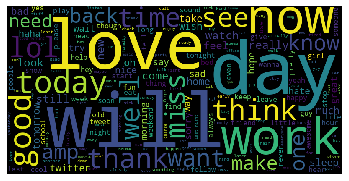

In [175]:
plt.imshow(wc)
plt.axis('off')
plt.show()

# Spelling Correction

In [176]:
!pip install -U textblob

You should consider upgrading via the 'c:\users\dell\anacondaorg\python.exe -m pip install --upgrade pip' command.


In [177]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [178]:
from textblob import TextBlob

In [179]:
x = 'thankks forr waching it'

In [180]:
x = TextBlob(x).correct()

In [181]:
x

TextBlob("thanks for watching it")

# Tokenization using TextBlob

In [182]:
x = 'thanks#watching this video. please like it'

In [183]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [185]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


# Detecting Nouns

In [186]:
x = 'Breaking News: Donal Trump, the president of USA is looking to sign the agreement to land on moon'

In [188]:
doc = nlp(x)
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donal Trump
the president
USA
the agreement
moon


# Language Translation and Detection

In [189]:
x

'Breaking News: Donal Trump, the president of USA is looking to sign the agreement to land on moon'

In [190]:
tb = TextBlob(x)

In [191]:
tb.detect_language()

'en'

In [193]:
tb.translate(to = 'hi')

TextBlob("ब्रेकिंग न्यूज: डोनाल्ड ट्रम्प, संयुक्त राज्य अमेरिका के राष्ट्रपति को चंद्रमा पर उतरने के लिए समझौते पर हस्ताक्षर करने के लिए देख रहे हैं")

# use TextBlob's inbuilt Sentiment Classifier

In [220]:
from textblob.sentiments import NaiveBayesAnalyzer

In [227]:
x = 'loss'

In [228]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [229]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.5851063829787234, p_neg=0.41489361702127664)